## Showz analytics 
Based on the data set provided, we will seek to determine:

how customers use the service.

when they start buying.

how much money each customer contributes to the company.

when revenue covers the cost of customer acquisition.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load data
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [6]:
#First, let's explore the structure of cost data.
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
#Transform data to datetime
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [9]:
#Daily users
users_per_day = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique()
print(f'=== Daily users ===')
print(f'Days analyzed: {len(users_per_day)}')
print(f'The average daily users: {users_per_day.mean().round()} ')
print(f'Max users per day: {users_per_day.max()} ')
print(f'Minimun users per day: { users_per_day.min()}')

=== Daily users ===
Days analyzed: 364
The average daily users: 908.0 
Max users per day: 3319 
Minimun users per day: 1


In [10]:
#weekly users
visits['weekly'] = visits['Start Ts'].dt.to_period('W')
users_per_week = visits.groupby('weekly')['Uid'].nunique()
print(f'=== weekly users ===')
print(f"Weeks analyzed: {len(users_per_week)}")
print(f'Weekly average: {users_per_week.mean().round()}')
print(f'weekly maximus: {users_per_week.max()}')
print(f"weekly minimun: {users_per_week.min()}")

=== weekly users ===
Weeks analyzed: 53
Weekly average: 5716.0
weekly maximus: 10586
weekly minimun: 2021


In [11]:
#Monthly users
visits['monthly'] = visits['Start Ts'].dt.to_period('M')
users_per_month = visits.groupby('monthly')['Uid'].nunique()
print(f'=== Monthly users ===')
print(f'Months analyzed: {len(users_per_month)}')
print(f"Month average: {users_per_month.mean().round()}")
print(f"monthly maximus: {users_per_month.max()}")
print(f"weekly minimum: {users_per_month.min()}")

=== Monthly users ===
Months analyzed: 12
Month average: 23228.0
monthly maximus: 32797
weekly minimum: 11631


In [12]:
#Sessions per day
daily_sessions = visits.groupby(visits['Start Ts'].dt.date).size()
print(f'=== Sessions info ===')
print(f"Average daily sessions: {daily_sessions.mean().round()}")
print(f"Maximus daily sessions: {daily_sessions.max()}")
print(f"Minimum daily sessions: { daily_sessions.min()}")

=== Sessions info ===
Average daily sessions: 987.0
Maximus daily sessions: 4042
Minimum daily sessions: 1


In [13]:
# Sessions per day
visits['date'] = visits ['Start Ts'].dt.date
days_per_users = visits.groupby('Uid')['Start Ts'].nunique()
frequency_users = visits.groupby('Uid').size()
print(f"Total unique users: {len(days_per_users)}")
print(f"Total sessions: {len(visits)}")

Total unique users: 228169
Total sessions: 359400


Now we can see that after subtracting the total number of sessions minus the unique sessions, we determine that we have 131,231 sessions from users who have more than one session. 

In [14]:
days_per_users = visits.groupby('Uid')['date'].nunique()


In [15]:
print(f"Total unique users: {len(days_per_users)}")
print(f"Average days per user: {days_per_users.mean():.2f}")
print(f"Average sessions per user: {frequency_users.mean():.2f}")

Total unique users: 228169
Average days per user: 1.45
Average sessions per user: 1.58


In [16]:
#Duration per session
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds # to obtain data in seconds

In [17]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid,weekly,monthly,date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-18/2017-12-24,2017-12,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19/2018-02-25,2018-02,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-26/2017-07-02,2017-07,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-14/2018-05-20,2018-05,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-25/2017-12-31,2017-12,2017-12-27,0


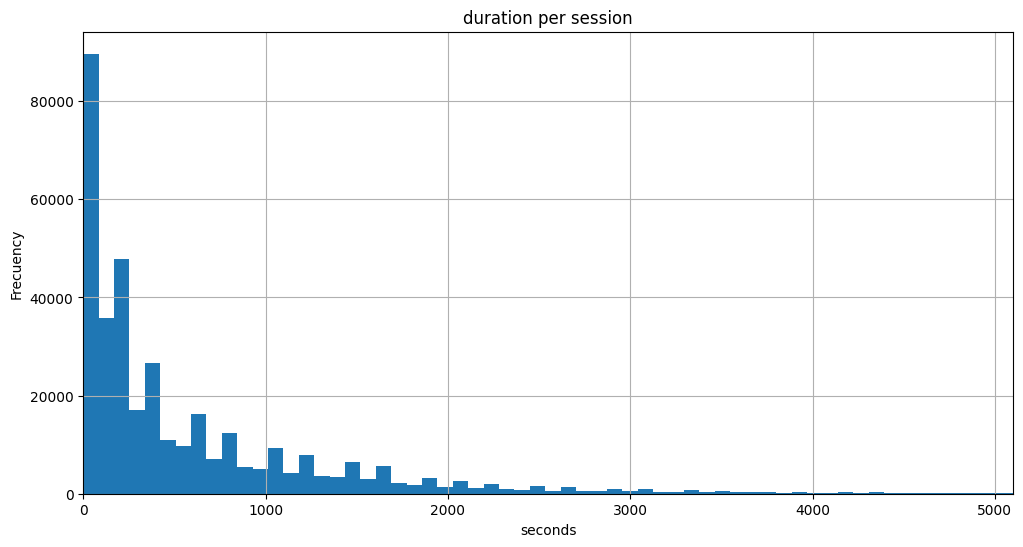

In [18]:
plt.figure(figsize= (12, 6))
visits['session_duration'].hist(bins= 1000)
plt.title('duration per session')
plt.xlabel('seconds')
plt.ylabel('Frecuency')
plt.xlim(0, 5100)
plt.show()

## Duration per session


We can see in the graph that most sessions last 0 seconds, so it would be important to analyze what the problem is with so many sessions that do not remain active for such short periods of time.


In [19]:
print(F"The average session duration is : {visits['session_duration'].mean().round()} Seconds ")

The average session duration is : 644.0 Seconds 


In [20]:
# How often the users return?

In [21]:
visits_frequency = visits.sort_values(['Uid', "Start Ts"])

In [22]:
visits_frequency['day_since_last_visit'] = visits_frequency.groupby('Uid')['Start Ts'].diff().dt.days

In [23]:
visits_frequency['day_since_last_visit']

196543      NaN
257333      NaN
173818      NaN
173142      NaN
192554    152.0
          ...  
175259      NaN
293449      NaN
319162      NaN
222173    144.0
132805      NaN
Name: day_since_last_visit, Length: 359400, dtype: float64

In [24]:
return_frequency = visits_frequency.groupby("Uid").agg({
    "day_since_last_visit" : ['mean', 'median', 'min', 'max'],
    'session_duration' : 'count'
})

In [25]:
return_frequency

day_since_last_visit                       \
                                     mean median    min    max   
Uid                                                              
11863502262781                        NaN    NaN    NaN    NaN   
49537067089222                        NaN    NaN    NaN    NaN   
297729379853735                       NaN    NaN    NaN    NaN   
313578113262317                      86.5   86.5   21.0  152.0   
325320750514679                     148.0  148.0  148.0  148.0   
...                                   ...    ...    ...    ...   
18446403737806311543                  NaN    NaN    NaN    NaN   
18446424184725333426                  NaN    NaN    NaN    NaN   
18446556406699109058                  NaN    NaN    NaN    NaN   
18446621818809592527                144.0  144.0  144.0  144.0   
18446676030785672386                  NaN    NaN    NaN    NaN   

                     session_duration  
                                count  
Uid                                    
11863502262781                      1  
49537067089222                      1  
297729379853735                     1  
313578113262317                     3  
325320750514679                     2  
...                               ...  
18446403737806311543                1  
18446424184725333426                1  
18446556406699109058                1  
18446621818809592527                2  
18446676030785672386                1  

[228169 rows x 5 columns]

In [26]:
visits_frequency['day_since_last_visit'].mean().round()

28.0

In [27]:
total_users = len(return_frequency)
return_users = return_frequency['day_since_last_visit', 'mean'].notna().sum()

In [28]:
retention_rate = (return_users / total_users) * 100


In [29]:
print(f"The total of users is: {total_users}")
print(f"Returning ussers : {return_users}")
print(f"The retention rate is : {retention_rate:.1f}%")


The total of users is: 228169
Returning ussers : 52128
The retention rate is : 22.8%


In [30]:
avg_days_beteween_visits = return_frequency[('day_since_last_visit', 'mean')].mean()
print(f"Average days beteween visits: {avg_days_beteween_visits:.1f}")

Average days beteween visits: 40.7


In [31]:
session_counts = return_frequency[('session_duration', 'count')]
print("Distibution of session count per user:")
print(session_counts.value_counts().head(10))



Distibution of session count per user:
1     176041
2      30926
3      10184
4       4357
5       2283
6       1243
7        807
8        513
9        356
10       239
Name: (session_duration, count), dtype: int64


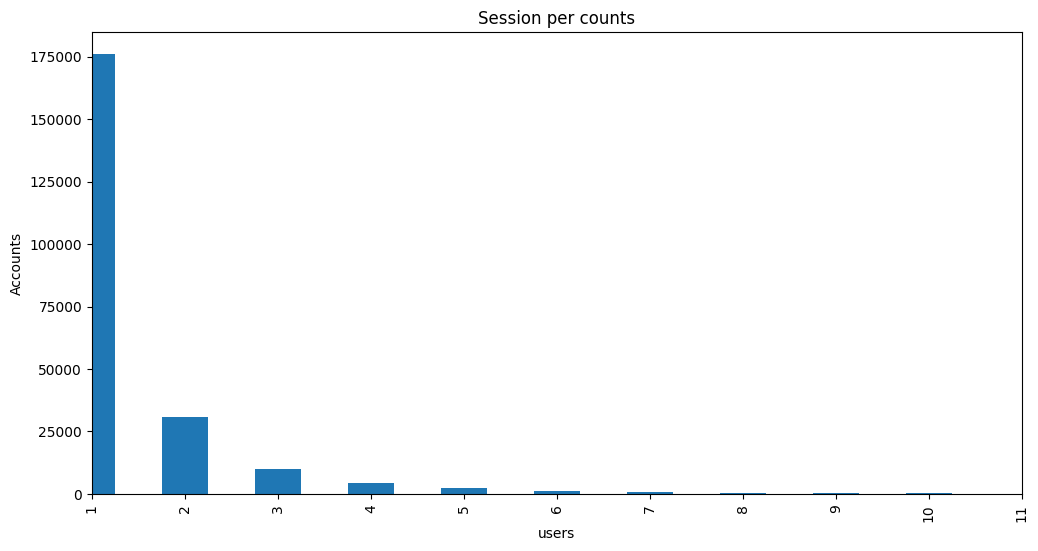

In [32]:
plt.figure(figsize= (12, 6))
session_counts.value_counts().sort_index().plot(kind= 'bar')
plt.title('Session per counts')
plt.xlabel('users')
plt.ylabel('Accounts')
plt.xlim(0, 10)
plt.show()

## Data analysis: 

What does this distribution tell us?
Results obtained:
176,041 users had only 1 session
30,926 users had 2 sessions
10,184 users had 3 sessions
And so on...

Most users (77.2%) only visited once (176,041 out of 228,169 total users).
Only 22.8% returned (as calculated in cell 26).
Typical pattern: Many new users, few frequent users.

# Sales

In [33]:
#First, let's explore the structure of sales data.
print("=== Data ORDERS ===")
orders.info()
print("\n=== First lines ===")
print(orders.head())

=== Data ORDERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

=== First lines ===
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [34]:
# dates to datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
print("=== purchuase dates range  ===")
print(f"first buy: {orders['Buy Ts'].min()}")
print(f"last buy: {orders['Buy Ts'].max()}")

=== purchuase dates range  ===
first buy: 2017-06-01 00:10:00
last buy: 2018-06-01 00:02:00


In [35]:
# First visit per user
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visit.columns = ['Uid', 'first_visit_date']

# first purchase per user
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase.columns = ['Uid', 'first_purchase_date']

print(f"Unique users with visits: {len(first_visit)}")
print(f"Unique users with purchases: {len(first_purchase)}")

Unique users with visits: 228169
Unique users with purchases: 36523


## Key data we have:
- 228,169 users with visits
- 36,523 users with purchases
- Overall conversion rate: 16.0% (36,523/228,169)

In [36]:
# Merge first visit with the first purchase 
conversion_analysis = first_visit.merge(first_purchase, on='Uid', how='inner')

print(f"Users who visited and purchased: {len(conversion_analysis)}")

# Calculate days between first visit and first purchase
conversion_analysis['days_to_conversion'] = (
    conversion_analysis['first_purchase_date'] - 
    conversion_analysis['first_visit_date']
).dt.days

print(f"Range of days for conversion:")
print(f"Minimum: {conversion_analysis['days_to_conversion'].min()} days")
print(f"Maximum: {conversion_analysis['days_to_conversion'].max()} days")
print(f"Average: {conversion_analysis['days_to_conversion'].mean():.1f} days")

Users who visited and purchased: 36523
Range of days for conversion:
Minimum: 0 days
Maximum: 363 days
Average: 16.7 days


In [37]:
# Convertion category
def categorize_conversion(days):
    if days == 0:
        return 'Conversion 0d'
    elif days == 1:
        return 'Conversion 1d'
    elif days <= 7:
        return 'Conversion 2-7d'
    elif days <= 30:
        return 'Conversion 8-30d'
    else:
        return 'Conversion 30d+'

conversion_analysis['conversion_category'] = conversion_analysis['days_to_conversion'].apply(categorize_conversion)

# Convertion distribution
conversion_dist = conversion_analysis['conversion_category'].value_counts()
print("=== CONVERSION DISTRIBUTION ===")
print(conversion_dist)
print(f"\nPorcentages (%):")
print((conversion_dist / len(conversion_analysis) * 100).round(1))

=== CONVERSION DISTRIBUTION ===
Conversion 0d       26363
Conversion 30d+      4902
Conversion 8-30d     2178
Conversion 2-7d      2069
Conversion 1d        1011
Name: conversion_category, dtype: int64

Porcentages (%):
Conversion 0d       72.2
Conversion 30d+     13.4
Conversion 8-30d     6.0
Conversion 2-7d      5.7
Conversion 1d        2.8
Name: conversion_category, dtype: float64


# Conversion Analysis - Key Findings:
#### Immediate Conversion Dominates:
- 72.2% of users purchase on the SAME DAY they visit for the first time
- Only 2.8% purchase the following day

#### Time Patterns:
- 77.9% purchase within the first week (0d + 1d + 2-7d)
- 13.4% take more than 30 days to decide

In [38]:
# Add marketing channel information
conversion_with_source = conversion_analysis.merge(
    visits[['Uid', 'Source Id']].drop_duplicates(), 
    on='Uid', 
    how='left'
)

In [39]:
# Analyze conversion by channel
channel_conversion = conversion_with_source.groupby(['Source Id', 'conversion_category']).size().unstack(fill_value=0)
channel_conversion_pct = channel_conversion.div(channel_conversion.sum(axis=1), axis=0) * 100


In [40]:
print("=== CONVERSION PER CHANEL (%) ===")
print(channel_conversion_pct.round(1))

=== CONVERSION PER CHANEL (%) ===
conversion_category  Conversion 0d  Conversion 1d  Conversion 2-7d  \
Source Id                                                            
1                             58.9            4.5              8.5   
2                             55.4            3.9              8.3   
3                             64.8            3.1              6.7   
4                             63.8            3.1              7.0   
5                             67.9            2.8              6.0   
7                            100.0            0.0              0.0   
9                             53.0            2.8              7.0   
10                            65.8            4.6              6.3   

conversion_category  Conversion 30d+  Conversion 8-30d  
Source Id                                               
1                               19.2               8.9  
2                               22.7               9.8  
3                               18.4 

# Key Observations from the Channel Analysis:
Channel 7 stands out dramatically:

100% same-day conversion (0d)
0% conversions in all other time periods
This suggests either a very small sample size or a highly effective immediate-conversion channel
#### Same-day conversion leaders:

Channel 5: 67.9%

Channel 10: 65.8%

Channel 3: 64.8%

Channel 4: 63.8%
#### Channels with more patient customers:

Channel 9: Only 53% same-day, but 27.7% convert after 30+ days


Channel 2: 55.4% same-day, but 22.7% convert after 30+ days

In [41]:
# Analyze how many orders each user places
orders_per_user = orders.groupby('Uid').agg({
    'Buy Ts': 'count',  # Número de pedidos
    'Revenue': ['sum', 'mean']  # Ingresos totales y promedio
}).round(2)


In [42]:
# Simplify column names
orders_per_user.columns = ['total_orders', 'total_revenue', 'avg_order_value']
orders_per_user = orders_per_user.reset_index()


In [43]:
print("=== DISTRIBUTION OF ORDERS BY USER ===")
print(orders_per_user['total_orders'].value_counts().head(10))
print(f"\n Average orders per user: {orders_per_user['total_orders'].mean():.2f}")

=== DISTRIBUTION OF ORDERS BY USER ===
1     30231
2      4395
3      1086
4       375
5       147
6        79
7        41
8        24
10       15
12       10
Name: total_orders, dtype: int64

 Average orders per user: 1.38


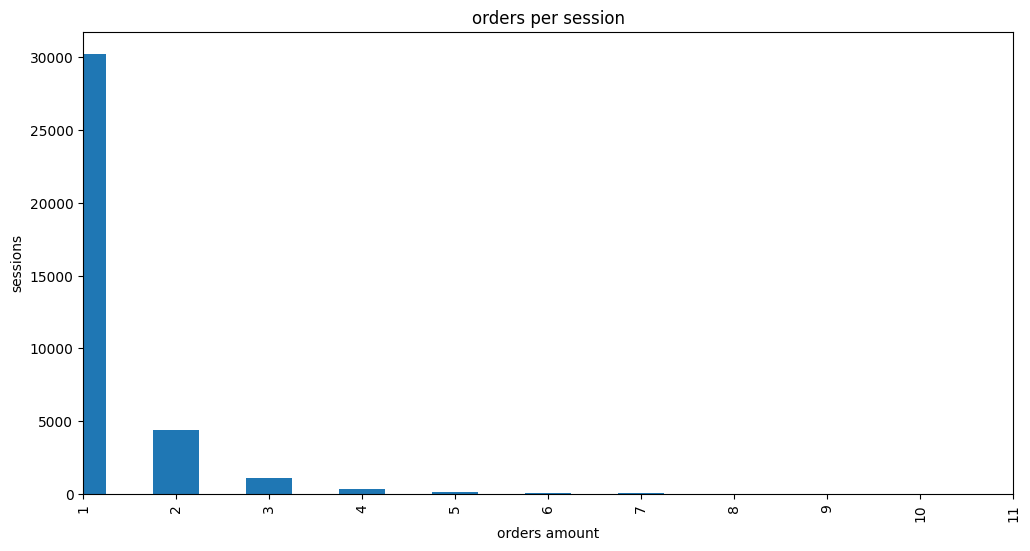

In [75]:
plt.figure(figsize= (12, 6))
orders_per_user['total_orders'].value_counts().sort_index().plot(kind= 'bar')
plt.title('orders per session')
plt.xlabel('orders amount')
plt.ylabel('sessions')
plt.xlim(0, 10)
plt.show()

## Key Observations:

The vast majority of users (30,231 out of ~36,400 total) make only 1 order

There's a sharp drop-off: only 4,395 users make 2 orders

Very few customers become highly frequent buyers (only 15 users made 10 orders, 10 users made 12 orders)

Average orders per user is 1.38, which is quite low

In [45]:
print("=== LIFETIME VALUE ANALYSIS ===")
print(f"LTV average per user: ${orders_per_user['total_revenue'].mean():.2f}")
print(f"LTV median: ${orders_per_user['total_revenue'].median():.2f}")
print(f"LTV maximum: ${orders_per_user['total_revenue'].max():.2f}")
print(f"LTV minimum: ${orders_per_user['total_revenue'].min():.2f}")


=== LIFETIME VALUE ANALYSIS ===
LTV average per user: $6.90
LTV median: $3.05
LTV maximum: $11810.18
LTV minimum: $0.00


In [46]:
# LTV distibution
print(f"\n=== LTV Distribution ===")
ltv_ranges = pd.cut(orders_per_user['total_revenue'], 
                   bins=[0, 1, 5, 10, 25, 50, 100, float('inf')],
                   labels=['$0-1', '$1-5', '$5-10', '$10-25', '$25-50', '$50-100', '$100+'])
print(ltv_ranges.value_counts())


=== LTV Distribution ===
$1-5       20466
$5-10       6493
$0-1        5639
$10-25      3088
$25-50       503
$50-100      174
$100+        146
Name: total_revenue, dtype: int64


In [47]:
# Segment customers by purchasing behavior
def segment_customers(row):
    if row['total_orders'] == 1:
        return 'One-time buyer'
    elif row['total_orders'] <= 3:
        return 'Repeat buyer'
    else:
        return 'Frequent buyer'

orders_per_user['customer_segment'] = orders_per_user.apply(segment_customers, axis=1)


In [48]:
# LTV per segment
ltv_by_segment = orders_per_user.groupby('customer_segment').agg({
    'total_revenue': ['mean', 'median', 'sum'],
    'total_orders': 'mean',
    'avg_order_value': 'mean',
    'Uid': 'count'
}).round(2)


In [49]:
print("=== LTV BY CUSTOMER SEGMENT  ===")
ltv_by_segment

=== LTV BY CUSTOMER SEGMENT  ===


total_revenue                   total_orders avg_order_value  \
                          mean median        sum         mean            mean   
customer_segment                                                                
Frequent buyer           99.41  16.49   80620.93        10.03            7.18   
One-time buyer            3.99   2.44  120683.00         1.00            3.99   
Repeat buyer              9.26   5.68   50753.27         2.20            4.19   

                    Uid  
                  count  
customer_segment         
Frequent buyer      811  
One-time buyer    30231  
Repeat buyer       5481

## LTV Analysis by Segment 
### Key Findings:
Value vs. Volume Paradox:

##### One-time buyers (83% of customers):

- Average LTV: $3.99
  
- Generate $120,683 (48% of total revenue)
  
- They are the majority but have lower individual value

##### Frequent buyers (2.2% of customers):

- Average LTV: $99.41 (25x more than one-time buyers!)
  
- Generate $80,621 (32% of total revenue)
  
- Few customers but very high value

##### Repeat buyers (15% of customers):
- Average LTV: $9.26
  
- Generate $50,753 (20% of total revenue)

# Marketing

In [50]:
# First, let's explore the structure of cost data.
print("=== structure of cost data ===")
print(f"Cost table format: {costs.shape}")
print(f"\nColumns: {costs.columns.tolist()}")
print(f"\n data type:")
print(costs.dtypes)
print(f"\n First lines:")
print(costs.head())


=== structure of cost data ===
Cost table format: (2542, 3)

Columns: ['source_id', 'dt', 'costs']

 data type:
source_id      int64
dt            object
costs        float64
dtype: object

 First lines:
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [76]:
# Verify the date range
print(f"\n Date range:")
print(f" From: {costs['dt'].min()}")
print(f" To: {costs['dt'].max()}")


 Date range:
 From: 2017-06-01 00:00:00
 To: 2018-05-31 00:00:00


In [77]:
# Total spending
total_marketing_spend = costs['costs'].sum()
print(f"=== TOTALES MARKETING SPENDING ===")
print(f"Total cost: ${total_marketing_spend:,.2f}")


=== TOTALES MARKETING SPENDING ===
Total cost: $329,131.62


In [78]:
# Expenses by source of acquisition
spend_by_source = costs.groupby('source_id')['costs'].agg(['sum', 'mean', 'count']).round(2)
spend_by_source.columns = ['total_spend', 'avg_daily_spend', 'days_active']
spend_by_source = spend_by_source.sort_values('total_spend', ascending=False)


In [79]:
print(f"\n=== Expenses by source of acquisition ===")
print(spend_by_source)



=== Expenses by source of acquisition ===
           total_spend  avg_daily_spend  days_active
source_id                                           
3            141321.63           389.32          363
4             61073.60           168.25          363
5             51757.10           142.19          364
2             42806.04           117.92          363
1             20833.27            57.39          363
10             5822.49            16.04          363
9              5517.49            15.20          363


In [80]:
# Percentage of expenditure by source
spend_by_source['spend_percentage'] = (spend_by_source['total_spend'] / total_marketing_spend * 100).round(1)
print(f"\n=== DISTRIBUCIÓN PORCENTUAL DE GASTOS ===")
print(spend_by_source[['total_spend', 'spend_percentage']])


=== DISTRIBUCIÓN PORCENTUAL DE GASTOS ===
           total_spend  spend_percentage
source_id                               
3            141321.63              42.9
4             61073.60              18.6
5             51757.10              15.7
2             42806.04              13.0
1             20833.27               6.3
10             5822.49               1.8
9              5517.49               1.7


In [81]:
# Total monthly expenses
costs['dt'] = pd.to_datetime(costs['dt'])  # Prepare 'dt' colum to extract month and year
costs['year_month'] = costs['dt'].dt.to_period('M')
monthly_spend = costs.groupby('year_month')['costs'].sum()
print("===Total monthly expenses  ===")
print(monthly_spend)


===Total monthly expenses  ===
year_month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64


In [82]:
# Monthly expenses by source
monthly_spend_by_source = costs.groupby(['year_month', 'source_id'])['costs'].sum().unstack(fill_value=0)
print(f"\n=== Monthly expenses by source ===")
print(monthly_spend_by_source)



=== Monthly expenses by source ===
source_id        1        2         3        4        5       9       10
year_month                                                              
2017-06     1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07     1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08      951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09     1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10     2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11     2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12     2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01     2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02     2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03     1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04     1327.49  2993.70   9296.81  4408.49  3501.15  373.49  388.25
2018-05     146

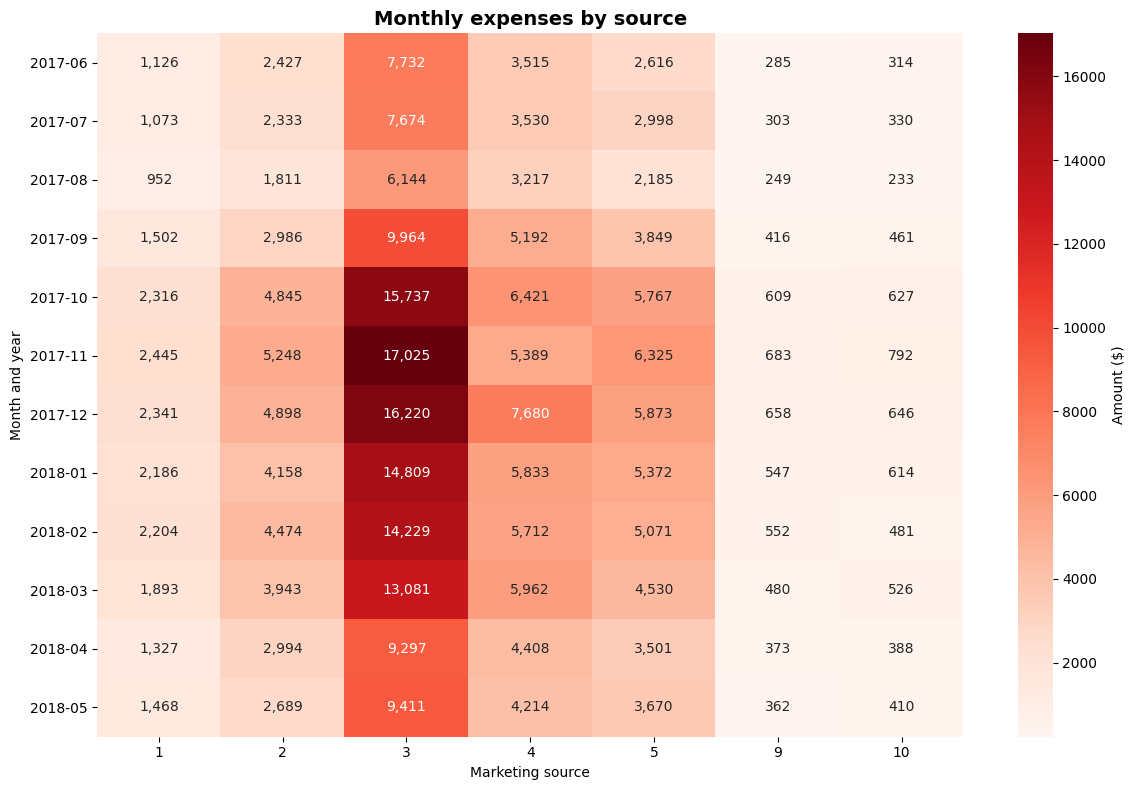

In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_spend_by_source, 
            annot=True, 
            fmt=',.0f', 
            cmap='Reds', 
            cbar_kws={'label': 'Amount ($)'})
plt.title('Monthly expenses by source', fontsize=14, fontweight='bold')
plt.xlabel('Marketing source')
plt.ylabel('Month and year')
plt.tight_layout()
plt.show()

In [58]:
# General trend
print(f"\n=== General trend ===")
print(f"Average monthly expenditure: ${monthly_spend.mean():,.2f}")
print(f"Month with the highest expenditure: {monthly_spend.idxmax()} (${monthly_spend.max():,.2f})")
print(f"Month with the lowest expenditure: {monthly_spend.idxmin()} (${monthly_spend.min():,.2f})")


=== General trend ===
Average monthly expenditure: $27,427.63
Month with the highest expenditure: 2017-12 ($38,315.35)
Month with the lowest expenditure: 2017-08 ($14,790.54)


In [59]:
# Prepare data for CAC
# We need to count unique users acquired by each source
users_by_source = visits.groupby('Source Id')['Uid'].nunique().reset_index()
users_by_source.columns = ['source_id', 'unique_users']

In [60]:
# Combine with total expenses by source
cac_analysis = spend_by_source.merge(users_by_source, on='source_id', how='left')
cac_analysis['CAC'] = (cac_analysis['total_spend'] / cac_analysis['unique_users']).round(2)


In [61]:
print("=== COST OF ACQUISITION BY SOURCE (CAC)===")
print(cac_analysis[['total_spend', 'unique_users', 'CAC']].sort_values('CAC'))

=== COST OF ACQUISITION BY SOURCE (CAC)===
   total_spend  unique_users   CAC
6      5517.49          9264  0.60
5      5822.49          8067  0.72
1     61073.60         83525  0.73
2     51757.10         56974  0.91
4     20833.27         18999  1.10
3     42806.04         26245  1.63
0    141321.63         74756  1.89


##### Most efficient CAC:
Source 6: $0.60 per user

Source 5: $0.72 per user

Source 1: $0.73 per user

##### Most expensive CAC:

Source 0: $1.89 per user

Source 3: $1.63 per user

### ROMI formula
ROMI = (Revenue - Marketing Expenses) / Marketing Expenses × 100

In [62]:
# Connect users with their acquisition source
user_source = visits[['Uid', 'Source Id']].drop_duplicates()
# Connect orders with procurement sources
orders_with_source = orders.merge(user_source, on='Uid', how='left')
print(orders_with_source.columns)

Index(['Buy Ts', 'Revenue', 'Uid', 'Source Id'], dtype='object')


In [63]:
# Calculate total income by source
revenue_by_source = orders_with_source.groupby('Source Id')['Revenue'].sum().reset_index()
revenue_by_source.columns = ['source_id', 'total_revenue']


In [64]:
print("=== INCOME BY SOURCE ===")
print(revenue_by_source.sort_values('total_revenue', ascending=False))

=== INCOME BY SOURCE ===
   source_id  total_revenue
3          4      119899.47
2          3      119193.48
1          2      113524.51
4          5      111532.65
0          1      101631.38
6          9       18809.68
7         10        8218.72
5          7           1.22


In [65]:
# Combine expenses and income
romi_analysis = spend_by_source.reset_index().merge(revenue_by_source, on='source_id', how='left')


In [66]:
# Calculate ROMI (return on marketing investment))
romi_analysis['ROMI'] = ((romi_analysis['total_revenue'] - romi_analysis['total_spend']) / romi_analysis['total_spend'] * 100).round(1)


In [67]:
# Calculate ROI (Return on Investment) ROI = (net profit - investments) / investments.
romi_analysis['ROI'] = (romi_analysis['total_revenue'] / romi_analysis['total_spend']).round(2)



In [68]:
print("=== ROMI ANALYSIS BY SOURCE ===")
print(romi_analysis[['source_id', 'total_spend', 'total_revenue', 'ROMI', 'ROI']].sort_values('ROMI', ascending=False))


=== ROMI ANALYSIS BY SOURCE ===
   source_id  total_spend  total_revenue   ROMI   ROI
4          1     20833.27      101631.38  387.8  4.88
6          9      5517.49       18809.68  240.9  3.41
3          2     42806.04      113524.51  165.2  2.65
2          5     51757.10      111532.65  115.5  2.15
1          4     61073.60      119899.47   96.3  1.96
5         10      5822.49        8218.72   41.2  1.41
0          3    141321.63      119193.48  -15.7  0.84


In [69]:
# Add the column “year_month” to the DataFrame “orders_with_source.”
orders_with_source['year_month'] = orders_with_source['Buy Ts'].dt.to_period('M')
orders['year_month'] = orders['Buy Ts'].dt.to_period('M')
# Create combined monthly data
# Monthly income by source
orders_with_source_monthly = orders_with_source.groupby(['year_month', 'Source Id'])['Revenue'].sum().reset_index()
orders_with_source_monthly.columns = ['year_month', 'source_id', 'monthly_revenue']


In [70]:
# Combine monthly expenses and income
monthly_data = costs.groupby(['year_month', 'source_id'])['costs'].sum().reset_index()
monthly_data = monthly_data.merge(orders_with_source_monthly, on=['year_month', 'source_id'], how='left')
monthly_data['monthly_revenue'] = monthly_data['monthly_revenue'].fillna(0)


In [71]:
# Calculate monthly ROMI
monthly_data['monthly_romi'] = ((monthly_data['monthly_revenue'] - monthly_data['costs']) / monthly_data['costs'] * 100).round(1)
monthly_data['monthly_roi'] = (monthly_data['monthly_revenue'] / monthly_data['costs']).round(2)


In [72]:
print("=== Monthly data ===")
print(monthly_data.head(10))


=== Monthly data ===
  year_month  source_id    costs  monthly_revenue  monthly_romi  monthly_roi
0    2017-06          1  1125.61          2563.84         127.8         2.28
1    2017-06          2  2427.38          3161.11          30.2         1.30
2    2017-06          3  7731.65          4165.12         -46.1         0.54
3    2017-06          4  3514.80          3958.09          12.6         1.13
4    2017-06          5  2616.12          3162.01          20.9         1.21
5    2017-06          9   285.22           752.06         163.7         2.64
6    2017-06         10   314.22           432.71          37.7         1.38
7    2017-07          1  1072.88          3947.25         267.9         3.68
8    2017-07          2  2333.11          4537.73          94.5         1.94
9    2017-07          3  7674.37          5257.28         -31.5         0.69


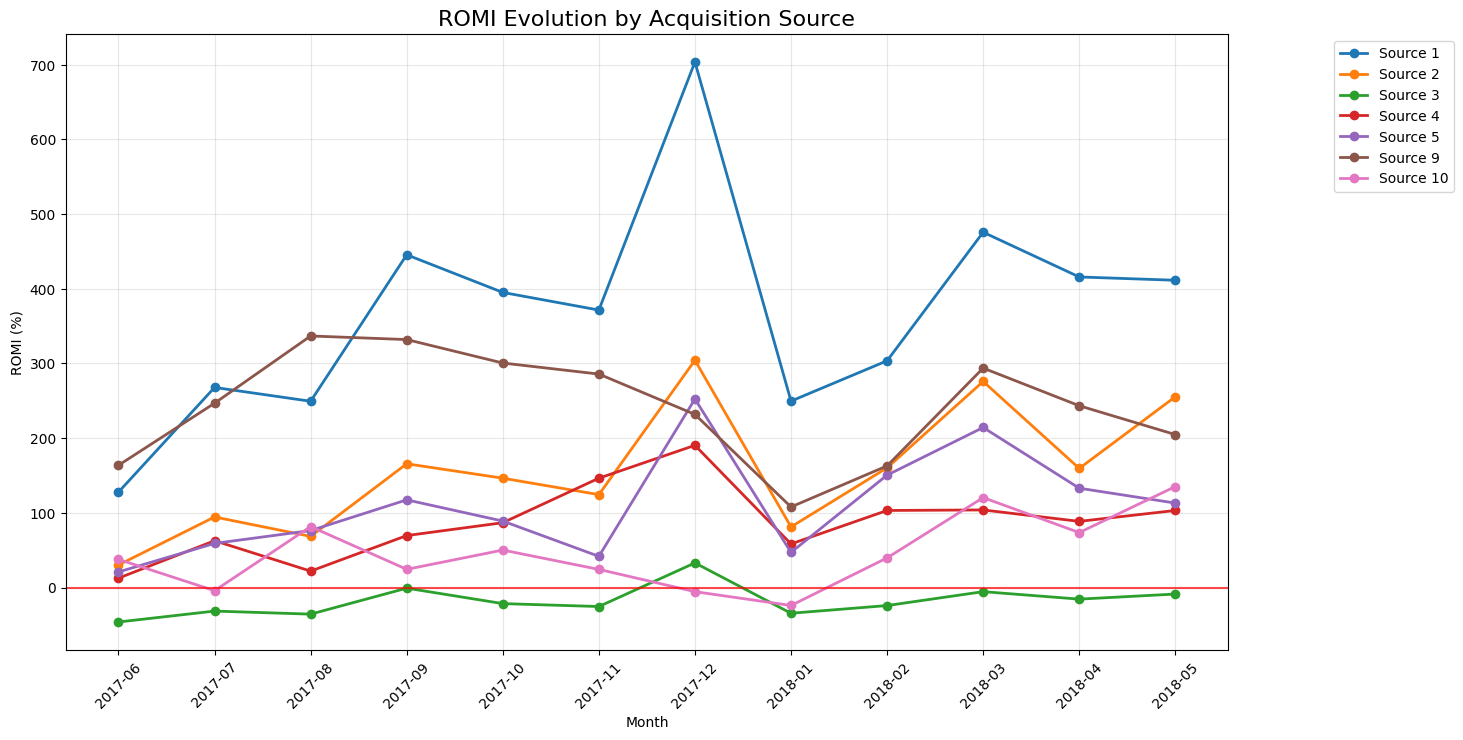

In [73]:
plt.figure(figsize=(15, 8))

# Create a chart for each source
for source in monthly_data['source_id'].unique():
    source_data = monthly_data[monthly_data['source_id'] == source]
    plt.plot(source_data['year_month'].astype(str), 
             source_data['monthly_romi'], 
             marker='o', 
             label=f'Source {source}',
             linewidth=2)

plt.title('ROMI Evolution by Acquisition Source', fontsize=16)
plt.xlabel('Month')
plt.ylabel('ROMI (%)')
plt.legend(bbox_to_anchor=(1.20, 1))
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', alpha=0.7, label='Break-even point')
plt.show()

We can see that most marketing sources generate considerable profits, with December being the month when sales skyrocket.

Marketing source 3 performs the worst, generating more losses in all months except December, where it exceeds the break-even point by only 50% of the investment, making it its best month. In contrast, marketing source number 3 for this same month generates a profit of 700% of the investment. 

## Conclusion

I would recommend investing more in marketing sources 1, 2, and 9, pausing source 9 during the months of October to December, and stopping investment in source 3.

The high investment in marketing for source number 3 could be the reason why it does not generate high revenue, which is why I would recommend not using it anymore, since it is the most expensive of all and barely generates enough income to avoid losses.

We can also see that our conversion rate of 16% is significantly low. This could be attributed to the fact that most sessions that are started are closed after 0 seconds, causing most users to have to create more than one account to make their purchases, or simply give up. This suggests that our website has problems starting sessions, as they close automatically, preventing the user from interacting with the website.

